# Rating Prediction Project

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
#to import dataset
dfr = pd.read_excel('review_rating.xlsx') 
dfr

,Unnamed: 0,Comment,Rating
0,0,"Reviewing after using it for last 3 days, boug...",5.0
1,1,I was using OnePlus 5t for last 3 years. Thoug...,5.0
2,2,Writing this review after 3 months of usage. W...,5.0
3,3,"For the price of 48k, I see this device as the...",5.0
4,4,Just loved it. It offers unbelievably everythi...,5.0
...,...,...,...
20464,20464,Osm TV,3
20465,20465,Super,4
20466,20466,All are good but only sound quality is not so ...,5
20467,20467,Software Optimisation is very poor,4


In [3]:
dfr.shape

(20469, 3)

In [4]:
#Getting general information of the data.
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20469 entries, 0 to 20468
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20469 non-null  int64 
 1   Comment     20264 non-null  object
 2   Rating      20469 non-null  object
dtypes: int64(1), object(2)
memory usage: 479.9+ KB


In [5]:
#Finding the null values in the columns of dataset
dfr.isnull().sum()

Unnamed: 0      0
Comment       205
Rating          0
dtype: int64

There are 205 null values present in comment column

In [6]:
dfr[dfr['Comment'].isnull()].index

Int64Index([  426,   552,   758,   901,   960,   997,  4946,  5033,  5043,
             5338,
            ...
            17470, 17475, 17480, 17485, 17490, 17495, 17500, 17505, 17510,
            17515],
           dtype='int64', length=205)

In [7]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Unnamed: 0 =  0
? in Unnamed: 0 =  0
- in Unnamed: 0 =  0
 ? in Unnamed: 0 =  0
 - in Unnamed: 0 =  0
?  in Unnamed: 0 =  0
-  in Unnamed: 0 =  0
 ?  in Unnamed: 0 =  0
 -  in Unnamed: 0 =  0
NA in Unnamed: 0 =  0
N/A in Unnamed: 0 =  0
 NA in Unnamed: 0 =  0
 N/A in Unnamed: 0 =  0
  in Comment =  0
? in Comment =  0
- in Comment =  58
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  126
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


There are 58 '-' blank spaces in Comment and 126 '-' blank space in Rating columns

In [8]:
print(dfr["Rating"].value_counts())

1.0    3857
5.0    3782
4.0    3631
3.0    3344
2.0    2977
5      1935
4       624
3       193
-       126
Name: Rating, dtype: int64


### Dataset Description

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Columns:

Comment: The Comments on various products

Rating: User Rating out of 5.

### Data Cleaning

In [9]:
dfr.dropna(inplace=True)

In [10]:
#Droping unnecessary column
dfr = dfr.drop(["Unnamed: 0"],axis=1)

In [11]:
dfr.shape

(20264, 2)

In [12]:
# Replacing the string entries in target column
dfr['Rating'] = dfr['Rating'].replace('1.0',1)
dfr['Rating'] = dfr['Rating'].replace('2.0',2)
dfr['Rating'] = dfr['Rating'].replace('3.0',3)
dfr['Rating'] = dfr['Rating'].replace('4.0',4)
dfr['Rating'] = dfr['Rating'].replace('5.0',5)
dfr['Rating'] = dfr['Rating'].replace('5',5)
dfr['Rating'] = dfr['Rating'].replace('4',4)
dfr['Rating'] = dfr['Rating'].replace('3',3)

In [13]:
print(dfr["Rating"].value_counts())

5    5661
4    4198
1    3805
3    3518
2    2957
-     125
Name: Rating, dtype: int64


In [14]:
print(dfr["Rating"].mode())

0    5
dtype: object


In [15]:
# replacing '-' with mode which is 5
dfr['Rating'] = dfr.Rating.replace('-', '5')

In [16]:
print(dfr["Rating"].value_counts())

5    5661
4    4198
1    3805
3    3518
2    2957
5     125
Name: Rating, dtype: int64


In [17]:
dfr['Rating'] = dfr['Rating'].replace('5',5)

In [18]:
print(dfr["Rating"].value_counts())

5    5786
4    4198
1    3805
3    3518
2    2957
Name: Rating, dtype: int64


In [19]:
# deleting rows with no comments instead '-' sign
index_name = dfr[ dfr['Comment'] == '-' ].index
index_name

Int64Index([ 1860,  1861,  1862,  1863,  1864,  1865,  1866,  1867,  1868,
             1869,  3364,  3365,  3366,  3367,  3368,  3369,  3370,  3371,
             3682,  3683,  3684,  3685,  3686,  3687,  3688,  3689,  3690,
             3691,  3898,  3899,  3900,  3901,  4354,  4355,  4356,  4357,
             4358,  4359,  4360,  4361,  6157,  8060,  8061,  8062,  8063,
             8064,  8065,  8066, 15227, 15228, 15229, 15230, 15231, 15232,
            15233, 15234, 15235, 15236],
           dtype='int64')

In [20]:
dfr.drop(index_name , inplace=True)

In [21]:
dfr.shape

(20206, 2)

In [22]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Comment =  0
? in Comment =  0
- in Comment =  0
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  0
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


Now there are no blank spaces, random characters in the columns

In [23]:
# to change data type
dfr["Rating"] = dfr.Rating.astype('int')

In [24]:
dfr.dtypes

Comment    object
Rating      int32
dtype: object

## visualization

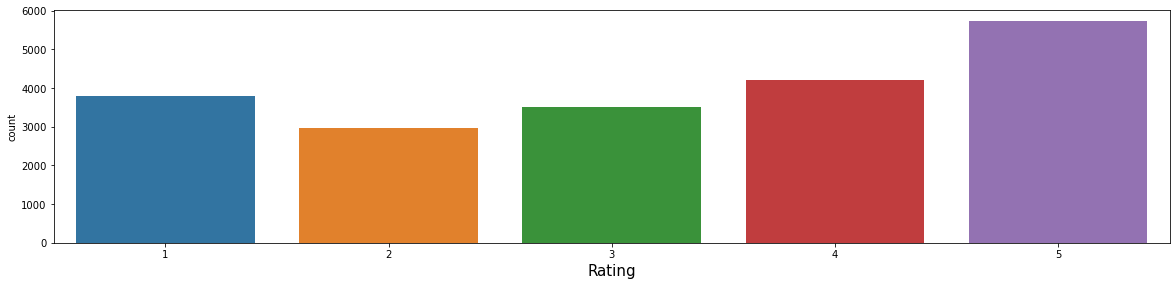

In [25]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in dfr.drop(columns = ['Comment'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(dfr[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [26]:
#Creating a length column with records of total string length of each comment text
dfr['Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength
0,"Reviewing after using it for last 3 days, boug...",5,1321.0
1,I was using OnePlus 5t for last 3 years. Thoug...,5,1064.0
2,Writing this review after 3 months of usage. W...,5,3730.0
3,"For the price of 48k, I see this device as the...",5,189.0
4,Just loved it. It offers unbelievably everythi...,5,2237.0


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

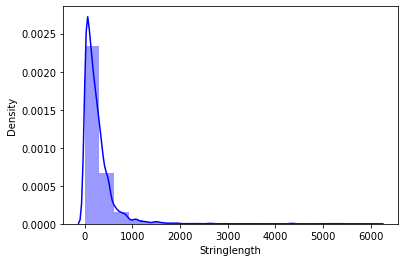

In [27]:
#Distribution of string length
sns.distplot(dfr.Stringlength, bins=20, color = 'blue')

most reviews are between 0 and 800 words

### Data Pre Processing

In [33]:
import re
import string

In [34]:
# Convert all messages to lower case
dfr['Comment'] = dfr['Comment'].str.lower()


dfr['Comment'] = dfr['Comment'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
dfr['Comment'] = dfr['Comment'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


dfr['Comment'] = dfr['Comment'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
dfr['Comment'] = dfr['Comment'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

dfr['Comment'] = dfr['Comment'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


dfr['Comment'] = dfr['Comment'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

dfr['Comment'] = dfr['Comment'].str.replace(r'[\_]',' ') #removing underscore characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

dfr['Comment'] = dfr['Comment'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace

In [35]:
dfr

,Comment,Rating,Stringlength
0,reviewing after using it for last num days bou...,5,1321.0
1,i was using oneplus numt for last num years th...,5,1064.0
2,writing this review after num months of usage ...,5,3730.0
3,for the price of numk see this device as the p...,5,189.0
4,just loved it it offers unbelievably everythin...,5,2237.0
...,...,...,...
20464,osm tv,3,6.0
20465,super,4,5.0
20466,all are good but only sound quality is not so ...,5,55.0
20467,software optimisation is very poor,4,34.0


In [1]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [41]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
dfr['Comment'] = dfr['Comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [44]:
lem=WordNetLemmatizer()
dfr['Comment'] = dfr['Comment'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in str(x).split()))

In [45]:
dfr

,Comment,Rating,Stringlength
0,reviewing using last num day bought offline st...,5,1321.0
1,using oneplus numt last num year thought chang...,5,1064.0
2,writing review num month usage divide review p...,5,3730.0
3,price numk see device perfect balance performa...,5,189.0
4,loved offer unbelievably everything could wish...,5,2237.0
...,...,...,...
20464,osm tv,3,6.0
20465,super,4,5.0
20466,good sound quality good,5,55.0
20467,software optimisation poor,4,34.0


In [46]:
dfr['Cleaned_Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,reviewing using last num day bought offline st...,5,1321.0,983
1,using oneplus numt last num year thought chang...,5,1064.0,715
2,writing review num month usage divide review p...,5,3730.0,2636
3,price numk see device perfect balance performa...,5,189.0,116
4,loved offer unbelievably everything could wish...,5,2237.0,1553


In [47]:
dfr

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,reviewing using last num day bought offline st...,5,1321.0,983
1,using oneplus numt last num year thought chang...,5,1064.0,715
2,writing review num month usage divide review p...,5,3730.0,2636
3,price numk see device perfect balance performa...,5,189.0,116
4,loved offer unbelievably everything could wish...,5,2237.0,1553
...,...,...,...,...
20464,osm tv,3,6.0,6
20465,super,4,5.0,5
20466,good sound quality good,5,55.0,23
20467,software optimisation poor,4,34.0,26


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

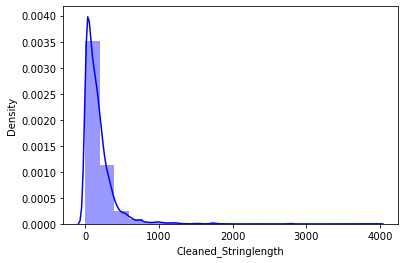

In [48]:
#Distribution of cleaned string length
sns.distplot(dfr.Cleaned_Stringlength, bins=20, color = 'blue')

After cleaning data coments are between 0-500 length.

In [53]:
from wordcloud import WordCloud

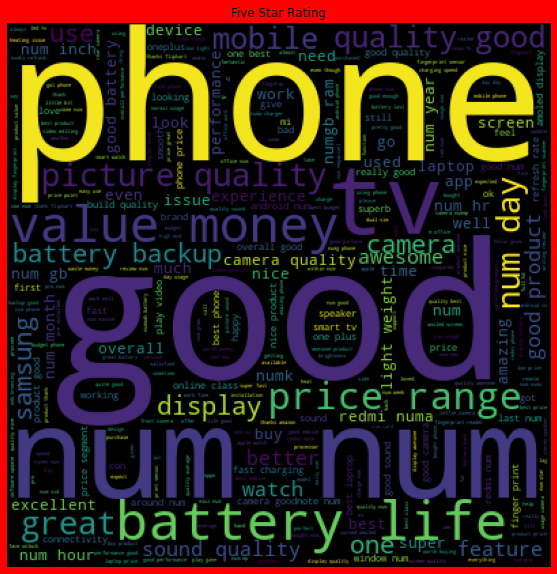

In [54]:
five=dfr['Comment'][dfr['Rating']==5]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(five))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Five Star Rating')
plt.show()

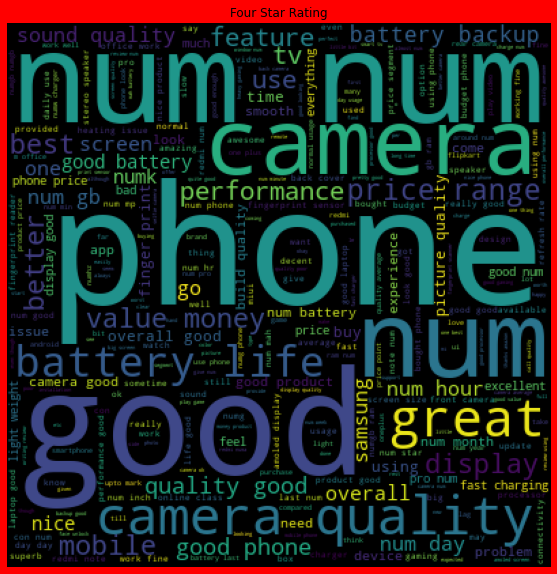

In [55]:
four=dfr['Comment'][dfr['Rating']==4]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(four))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Four Star Rating')
plt.show()

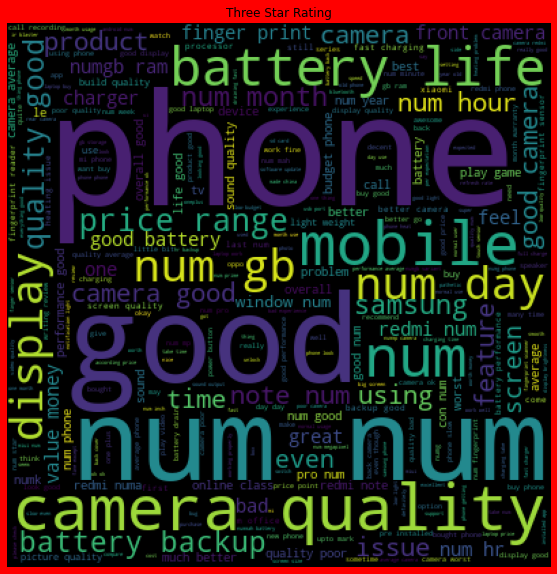

In [56]:
three=dfr['Comment'][dfr['Rating']==3]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(three))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Three Star Rating')
plt.show()

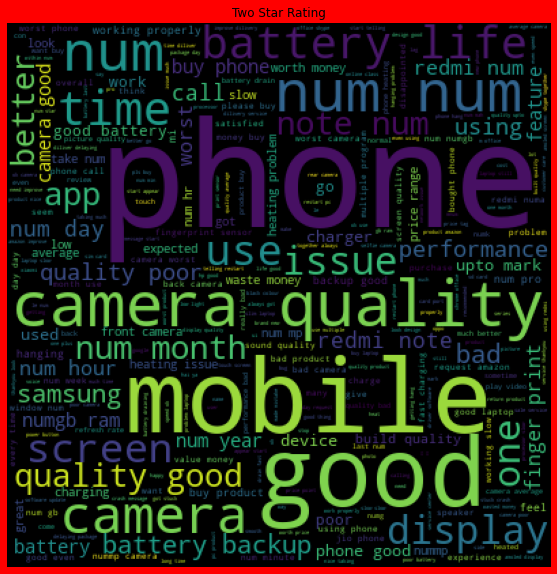

In [57]:
two=dfr['Comment'][dfr['Rating']==2]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(two))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Two Star Rating')
plt.show()

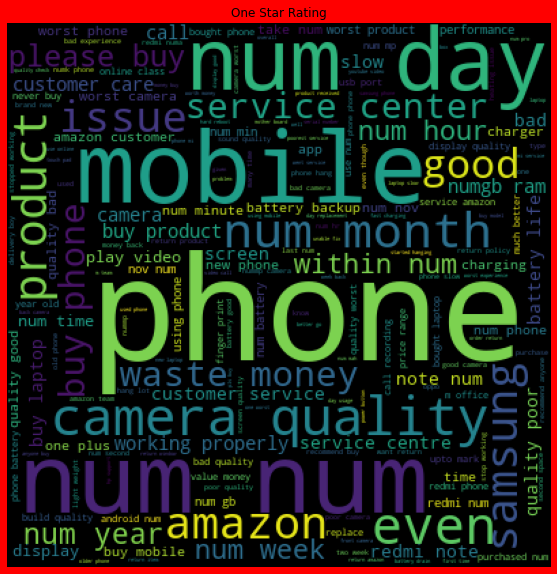

In [58]:
one=dfr['Comment'][dfr['Rating']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(one))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='One Star Rating')
plt.show()

From the graphs above the following observations are made:
* Reviews corresponding to 5.0 rating frequently carry words like: ‘good’,’excellent’,’quality’, ‘value money’ etc indicating very high customer satisfaction and high quality product.
* Reviews corresponding to 4.0 rating frequently carry words like: ‘good’,’great’,’performance’,’features’, ‘quality’,’price’ etc indicating high customer satisfaction
and good quality product.
* Reviews corresponding to 3.0 rating frequently carry words
like: ‘good’,’well’,’average,’quality’,’issue’ etc indicating
customer dissatisfaction and average to below average
product quality.
* Reviews corresponding to 2.0 rating frequently carry words like: ‘problem’, ‘bad’,’issues’, ’waste money’,’poor quality’ etc indicating high customer dissatisfaction and below average product quality.
* Reviews corresponding to 1.0 rating frequently carry words like: ‘stopped’, ’working’, ’cheap’, ’return’, ’issue’, ’waste money’, ’poor quality’,’ customer care’, ’bad’, ‘poor build quality’ etc indicate very high customerdissatisfaction and poor quality product.


Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they do not contribute to model building

In [59]:
dfr.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [60]:
from collections import Counter

In [61]:
fiv = Counter(",".join(dfr[dfr['Rating']==5]["Comment"]).split()).most_common(10)
fr = Counter(",".join(dfr[dfr['Rating']==4]["Comment"]).split()).most_common(10)
thr = Counter(",".join(dfr[dfr['Rating']==3]["Comment"]).split()).most_common(10)
tw = Counter(",".join(dfr[dfr['Rating']==2]["Comment"]).split()).most_common(10)
one = Counter(",".join(dfr[dfr['Rating']==1]["Comment"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Words and Ratings,with their counts")
Countdf['Five Star Words']=fiv
Countdf['Four Star Words']=fr
Countdf['Three Star Words']=thr
Countdf['Two Star Words']=tw
Countdf['One Star Words']=one
Countdf.head(10)

TOP 10 Words and Ratings,with their counts


,Five Star Words,Four Star Words,Three Star Words,Two Star Words,One Star Words
0,"(num, 8084)","(num, 5936)","(num, 4513)","(num, 2175)","(num, 4610)"
1,"(good, 3755)","(good, 3724)","(phone, 2251)","(phone, 1587)","(phone, 3035)"
2,"(phone, 2620)","(phone, 2620)","(good, 2073)","(camera, 988)","(product, 1182)"
3,"(quality, 1908)","(camera, 1839)","(camera, 1617)","(good, 985)","(camera, 1118)"
4,"(camera, 1770)","(quality, 1540)","(quality, 1168)","(quality, 881)","(laptop, 1070)"
5,"(battery, 1724)","(battery, 1434)","(battery, 1004)","(battery, 594)","(mobile, 1053)"
6,"(price, 1505)","(price, 1109)","(also, 620)","(time, 504)","(quality, 1036)"
7,"(product, 1286)","(display, 777)","(like, 608)","(mobile, 469)","(buy, 994)"
8,"(display, 1230)","(screen, 777)","(screen, 605)","(issue, 458)","(amazon, 940)"
9,"(best, 1161)","(use, 732)","(display, 571)","(laptop, 451)","(good, 827)"


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [64]:
features = tf_vec.fit_transform(dfr['Comment'])

In [68]:
X = features
y=dfr['Rating']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Balancing out classes in Label column using SMOTE technique.

In [70]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

### This is a Classification problem since Target column ('Rating') has Catergorical type of Data.

In [71]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.865458347856396 on random_state: 92


In [72]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 92)

In [75]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [76]:
RFC = RandomForestClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
pc= PassiveAggressiveClassifier()

### Training the Models

In [79]:
RFC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

All Models have been trained.

### Logistic Regression Model Accuracy

In [80]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [81]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[1417,  126,   99,   26,   13],
       [ 148, 1383,   90,   60,   18],
       [  91,  139, 1195,  153,  119],
       [  54,   68,  179, 1151,  327],
       [  82,   49,  115,  255, 1250]], dtype=int64)

In [82]:
print(accu)

              precision    recall  f1-score   support

           1       0.79      0.84      0.82      1681
           2       0.78      0.81      0.80      1699
           3       0.71      0.70      0.71      1697
           4       0.70      0.65      0.67      1779
           5       0.72      0.71      0.72      1751

    accuracy                           0.74      8607
   macro avg       0.74      0.74      0.74      8607
weighted avg       0.74      0.74      0.74      8607



### Random Forest Classifier Model Accuracy

In [83]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [84]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[1566,   44,   32,   23,   16],
       [  64, 1575,   17,   18,   25],
       [  68,   19, 1392,   84,  134],
       [  33,   20,   49, 1389,  288],
       [  40,   13,   43,  160, 1495]], dtype=int64)

In [85]:
print(accu)

              precision    recall  f1-score   support

           1       0.88      0.93      0.91      1681
           2       0.94      0.93      0.93      1699
           3       0.91      0.82      0.86      1697
           4       0.83      0.78      0.80      1779
           5       0.76      0.85      0.81      1751

    accuracy                           0.86      8607
   macro avg       0.87      0.86      0.86      8607
weighted avg       0.86      0.86      0.86      8607



### Multinomial Naive Bayes Model Accuracy

In [86]:
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)

In [87]:
conf_matrx = confusion_matrix(y_test,MNBpred)

In [88]:
conf_matrx

array([[1329,  187,   95,   36,   34],
       [ 120, 1322,  147,   84,   26],
       [ 116,  140, 1087,  206,  148],
       [  68,   77,  139, 1120,  375],
       [  84,   65,   91,  264, 1247]], dtype=int64)

In [89]:
print(accu)

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1681
           2       0.74      0.78      0.76      1699
           3       0.70      0.64      0.67      1697
           4       0.65      0.63      0.64      1779
           5       0.68      0.71      0.70      1751

    accuracy                           0.71      8607
   macro avg       0.71      0.71      0.71      8607
weighted avg       0.71      0.71      0.71      8607



### Complement Naive Bayes Model Accuracy

In [90]:
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)

In [91]:
conf_matrx = confusion_matrix(y_test,CNBpred)

In [92]:
conf_matrx

array([[1374,  172,   65,   32,   38],
       [ 155, 1342,   91,   80,   31],
       [ 125,  164, 1057,  198,  153],
       [ 102,   89,   91, 1047,  450],
       [ 107,   59,   70,  197, 1318]], dtype=int64)

In [93]:
print(accu)

              precision    recall  f1-score   support

           1       0.74      0.82      0.78      1681
           2       0.73      0.79      0.76      1699
           3       0.77      0.62      0.69      1697
           4       0.67      0.59      0.63      1779
           5       0.66      0.75      0.70      1751

    accuracy                           0.71      8607
   macro avg       0.72      0.71      0.71      8607
weighted avg       0.71      0.71      0.71      8607



### Passive Aggressive Classifier Model Accuracy

In [94]:
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)

In [95]:
conf_matrx = confusion_matrix(y_test,pcpred)

In [96]:
conf_matrx

array([[1516,   69,   42,   23,   31],
       [  38, 1559,   42,   25,   35],
       [  46,   53, 1404,   69,  125],
       [  34,   48,  107, 1298,  292],
       [  43,   58,  102,  217, 1331]], dtype=int64)

In [97]:
print(accu)

              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1681
           2       0.87      0.92      0.89      1699
           3       0.83      0.83      0.83      1697
           4       0.80      0.73      0.76      1779
           5       0.73      0.76      0.75      1751

    accuracy                           0.83      8607
   macro avg       0.83      0.83      0.83      8607
weighted avg       0.83      0.83      0.83      8607



### AdaBoost Classifier Model Accuracy

In [98]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [99]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[819, 437, 326,  57,  42],
       [420, 688, 365, 163,  63],
       [192, 364, 533, 431, 177],
       [ 36, 122, 428, 747, 446],
       [ 72,  75, 285, 486, 833]], dtype=int64)

In [100]:
print(accu)

              precision    recall  f1-score   support

           1       0.53      0.49      0.51      1681
           2       0.41      0.40      0.41      1699
           3       0.28      0.31      0.29      1697
           4       0.40      0.42      0.41      1779
           5       0.53      0.48      0.50      1751

    accuracy                           0.42      8607
   macro avg       0.43      0.42      0.42      8607
weighted avg       0.43      0.42      0.42      8607



### Model Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score as cvs

Logistic Regression

In [103]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.6240153363541304


Random Forest Classifier

In [104]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.7557337051237365


Multinomial Naive Bayes

In [105]:
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

0.5984315092366679


Complement Naive Bayes

In [106]:
print(cvs(CNB,smt_x,smt_y,cv=5).mean())

0.6133495991634715


Passive Aggressive Classifier

In [107]:
print(cvs(pc,smt_x,smt_y,cv=5).mean())

0.7278842802370165


Adaboost Classifier

In [108]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.37811084001394213


### ROC AUC curves

In [111]:
import scikitplot as sktplt

In [112]:
lr_prob = LOGR.predict_proba(x_test)
rf_prob = RFC.predict_proba(x_test)
adbc_prob = adbc.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

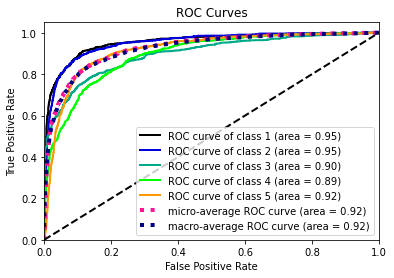

In [113]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

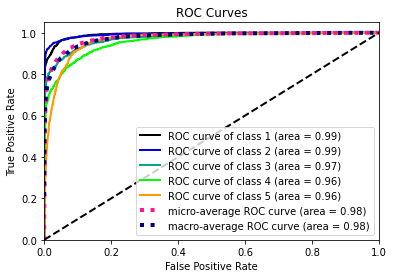

In [114]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

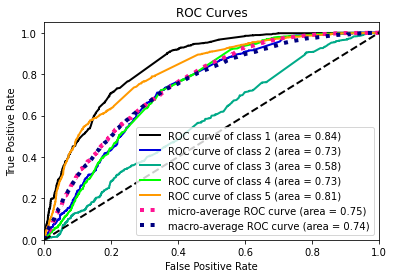

In [115]:
sktplt.metrics.plot_roc(y_test,adbc_prob) # Ada Boost Classifier ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

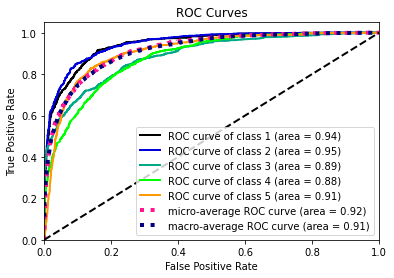

In [116]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

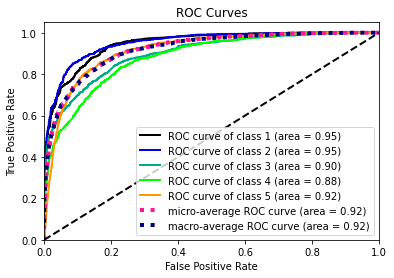

In [117]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves

### ROC AUC Scores

Logistic Regression

In [118]:
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.9230065019198236

Multinomial Naive Bayes

In [119]:
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.915030889138626

Complement Naive Bayes

In [120]:
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

0.9195214324772051

Adaboost Classifier

In [121]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo')

0.7389051854130201

Random Forest Classifier

In [122]:
roc_auc_score(y_test,rf_prob,multi_class='ovo')

0.9765221611655281

Based on comparing the above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores, it is determined that Random Forest Classifier is the best model for the dataset.

### Hyper Parameter Tuning

In [123]:
parameter = {'n_estimators':[400,500,600],
             'max_depth': [80,90,95],
             'min_samples_leaf':[2,5,30],
             'min_samples_split':[1,2,5],
             'criterion':['gini','entropy'],
             'max_features': ['auto', 'sqrt', 'log2']}

In [124]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [125]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 95],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 30],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [400, 500, 600]},
             verbose=1)

In [126]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 95,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [127]:
Best_mod = RandomForestClassifier(n_estimators = 500,criterion = 'entropy', max_depth= 95, max_features = 'sqrt',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

81.56151969327293


array([[1526,   79,   36,   28,   12],
       [  74, 1521,   41,   39,   24],
       [ 112,   58, 1253,  147,  127],
       [  55,   28,   57, 1295,  344],
       [  89,   23,   45,  169, 1425]], dtype=int64)

Random Forest Classifier has an accuracy of 81.56%

### Saving The Model

In [128]:
import joblib
joblib.dump(Best_mod,"BestModelRatingsClassifier.pkl")

['BestModelRatingsClassifier.pkl']

### Loading The Model

In [129]:
mod=joblib.load("BestModelRatingsClassifier.pkl")

In [130]:
mod.predict(x_test)

array([5, 1, 3, ..., 1, 2, 5])

In [133]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y[:8607]})
Prediction_accuracy.head()

,Predictions,Actual Values
0,5,5
1,1,5
2,3,5
3,5,5
4,2,5
